In [186]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_circles
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# 2. Comparison with Decision Trees and Bagging


In [4]:
warnings.simplefilter('ignore')

In [49]:
plt.rc('figure', figsize=(10, 6))
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'

In [5]:
n_train = 150
n_test = 1000
noise = 0.1

In [86]:
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = f(X) + np.random.normal(scale=noise, size=n_samples)
    return X.reshape(-1, 1), y
def rss(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2)

In [87]:
X_train, y_train = generate(n_train, noise) 
X_test, y_test = generate(n_test, noise)

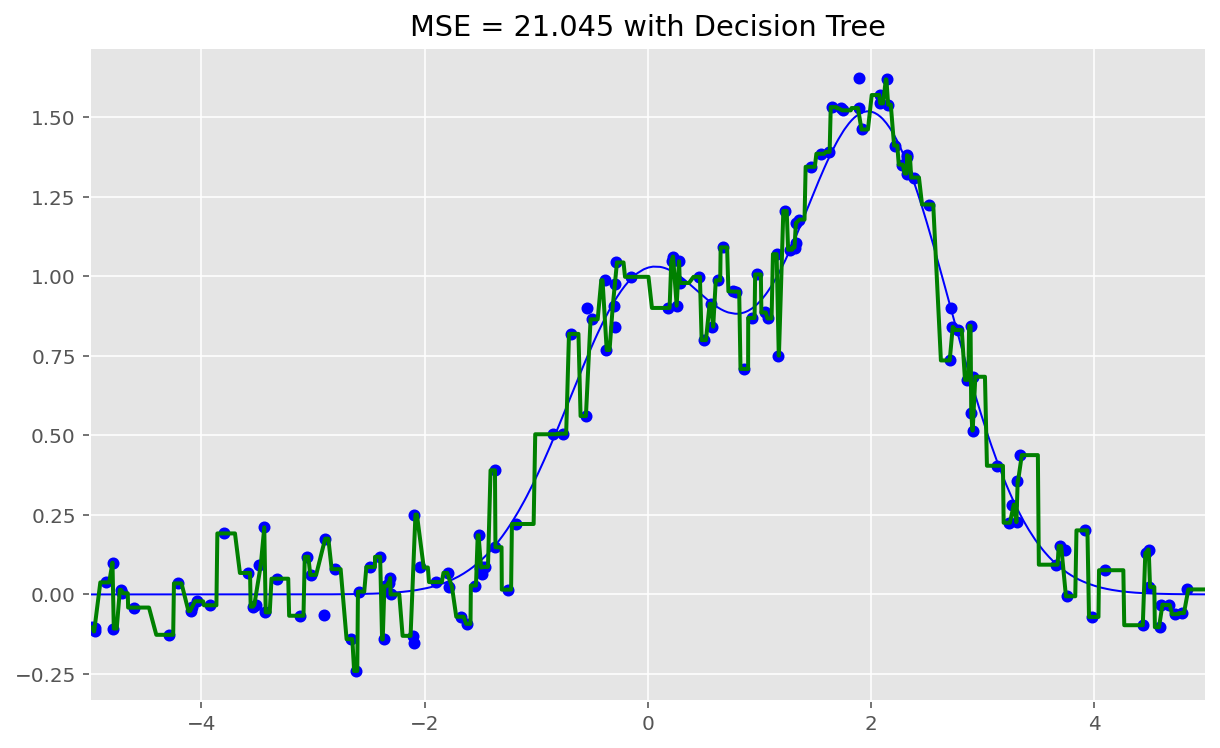

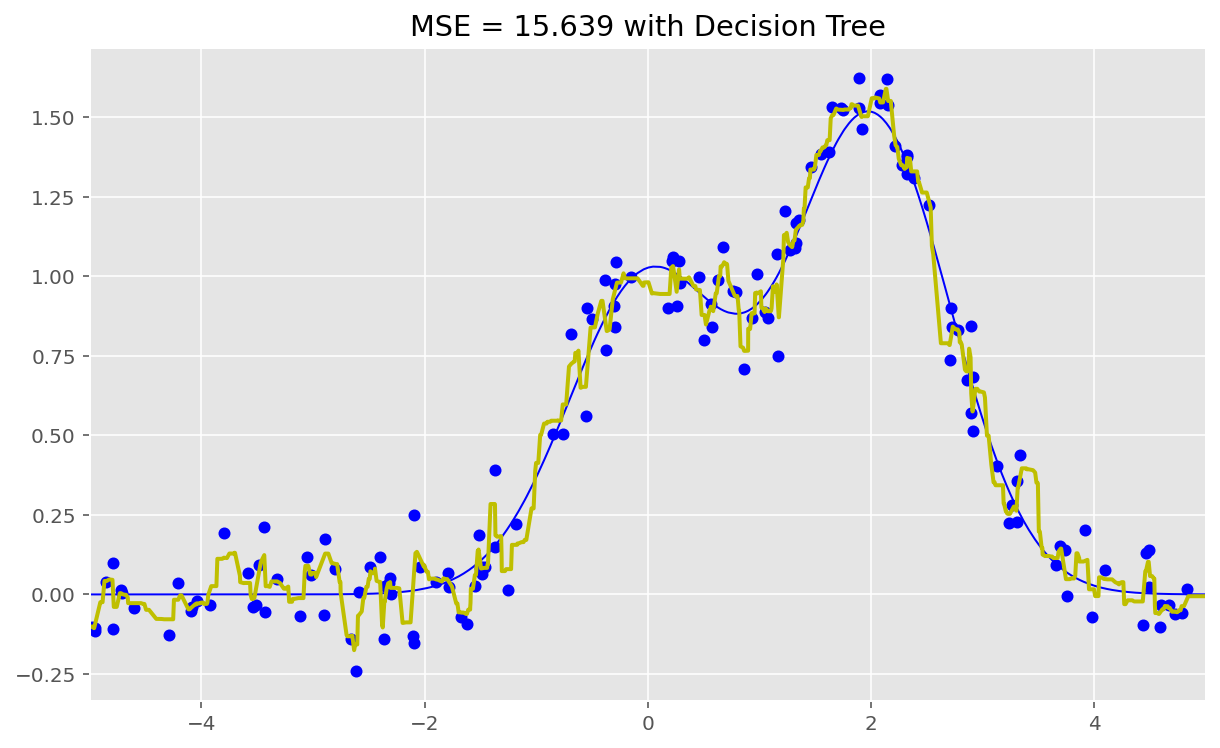

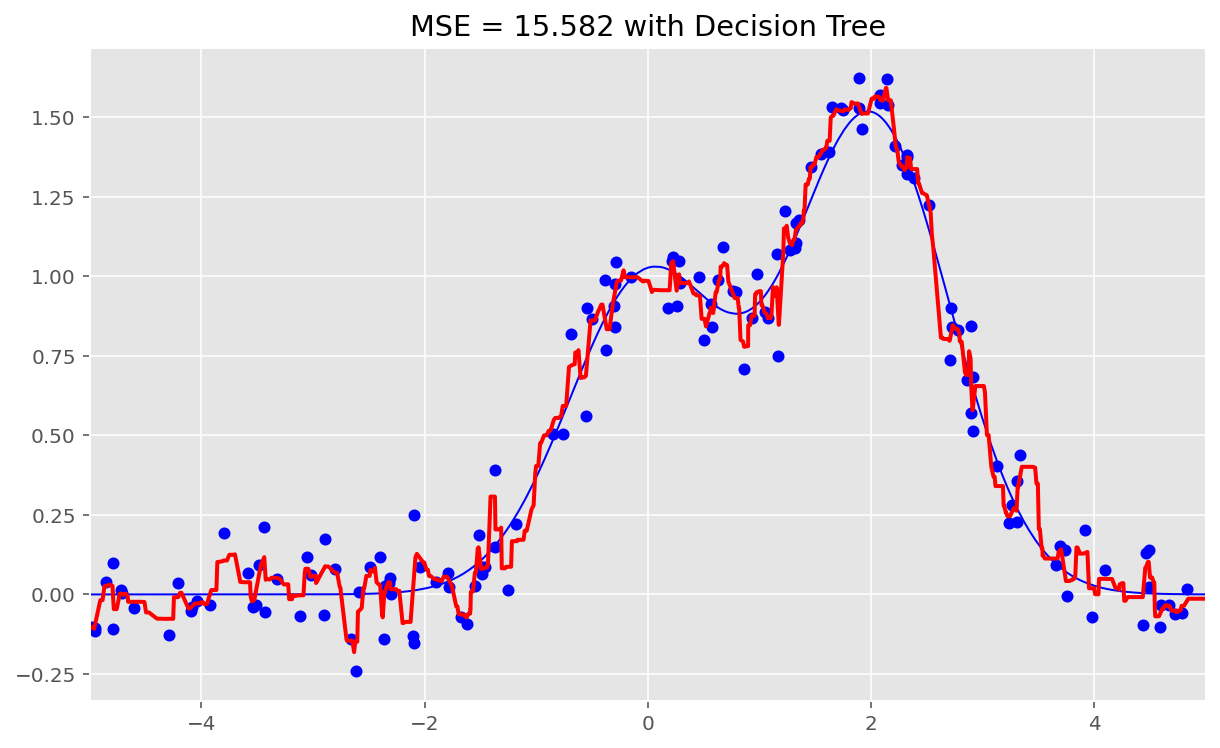

In [88]:
#decision tree
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)
d_predict = dtree.predict(X_test)
plt.plot(X_train, y_train, 'bo', markersize=5)
plt.plot(X_test, f(X_test), 'b-', lw=1)
plt.plot(X_test, d_predict, 'g-', lw=2)
plt.xlim([-5, 5])
plt.title(f'MSE = {rss(y_test, d_predict):.3f} with Decision Tree')
plt.show();
#bagging
bdt = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100)
bdt.fit(X_train, y_train)
bdt_predict = bdt.predict(X_test)
plt.plot(X_train, y_train, 'bo', markersize=5)
plt.plot(X_test, f(X_test), 'b-', lw=1)
plt.plot(X_test, bdt_predict, 'y', lw=2)
plt.xlim([-5, 5])
plt.title(f'MSE = {rss(y_test, bdt_predict):.3f} with Decision Tree')
plt.show();
#random forest
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)
plt.plot(X_train, y_train, 'bo', markersize=5)
plt.plot(X_test, f(X_test), 'b-', lw=1)
plt.plot(X_test, rf_predict, 'r', lw=2)
plt.xlim([-5, 5])
plt.title(f'MSE = {rss(y_test, rf_predict):.3f} with Decision Tree')
plt.show();

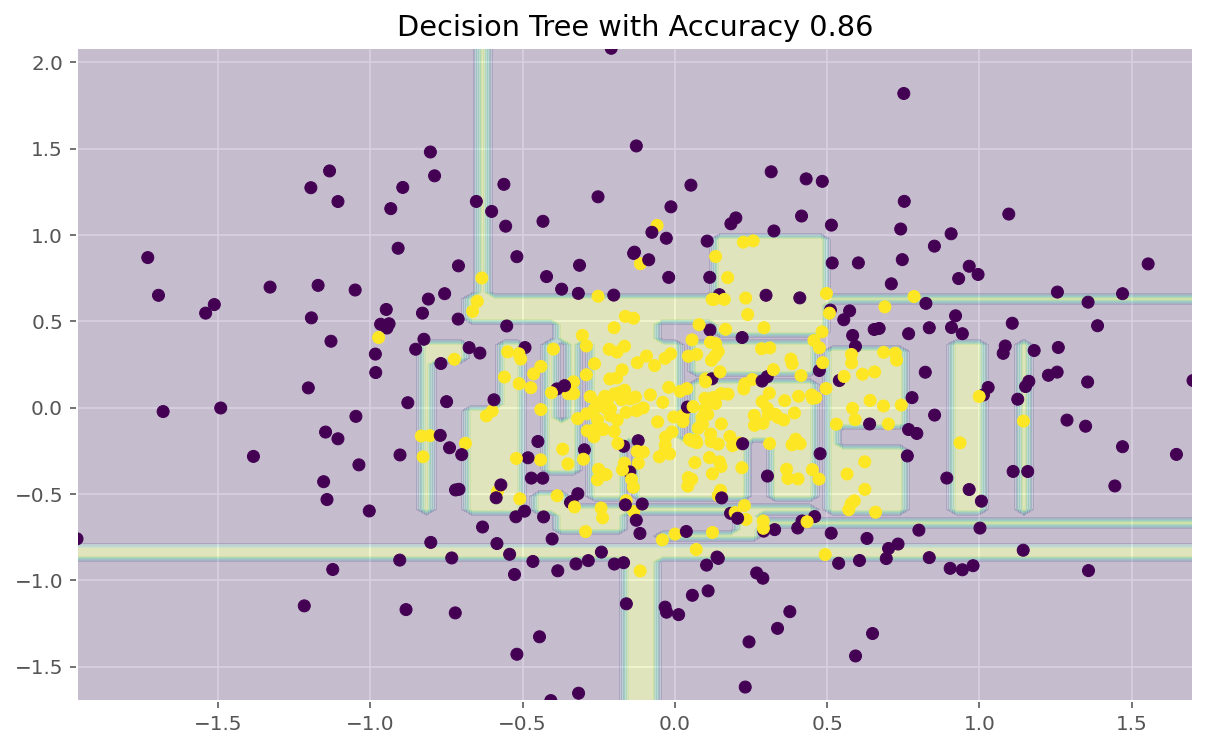

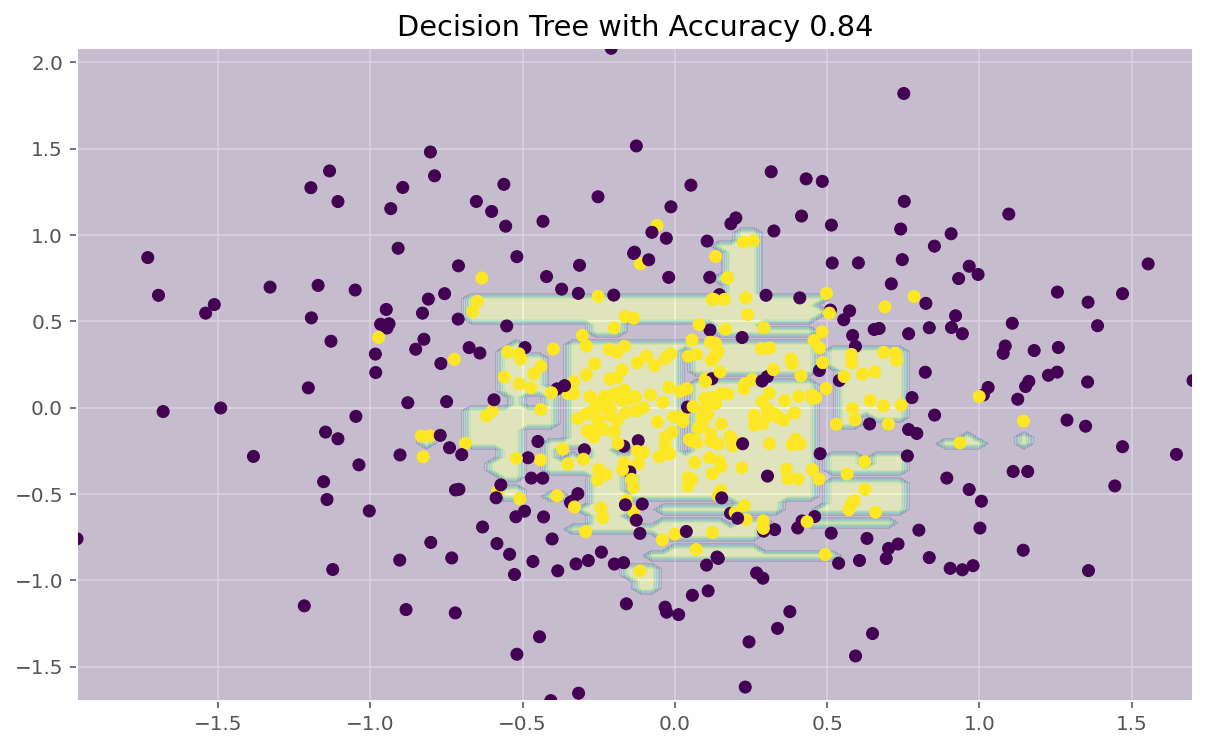

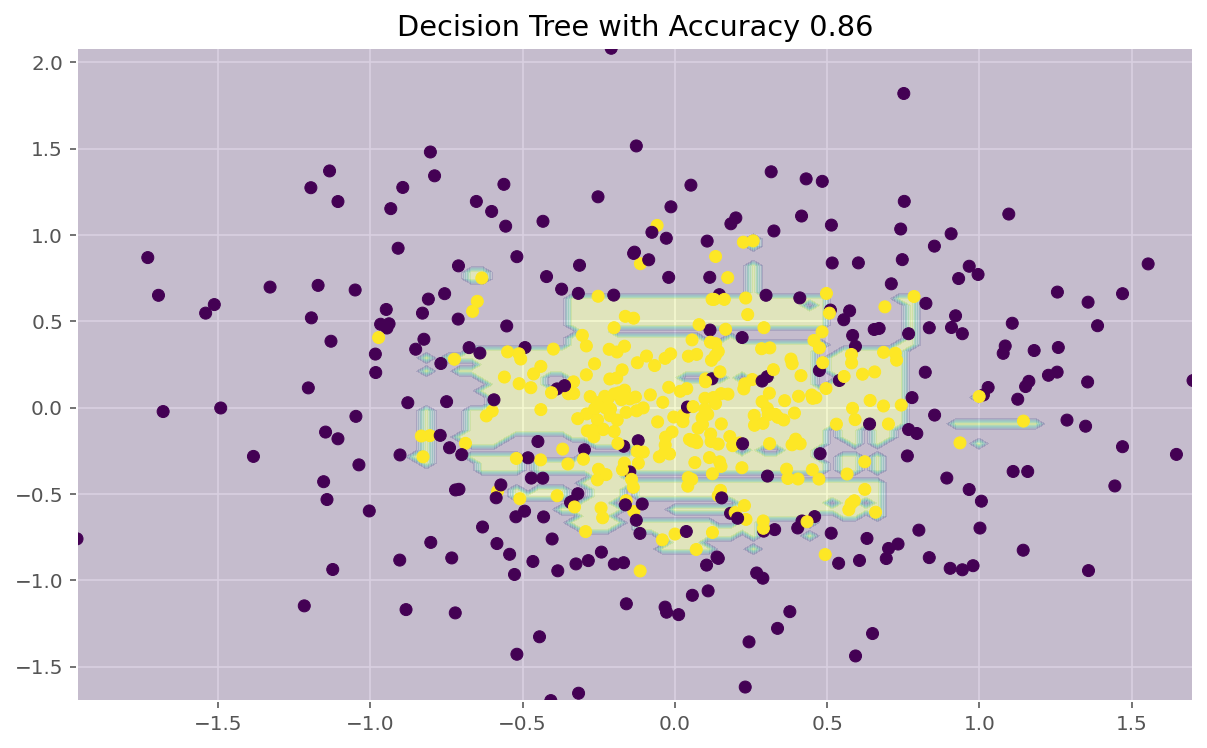

In [142]:
np.random.seed(42)
X, y = make_circles(n_samples=500, noise=0.35, random_state=42, factor=0.1)
X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(
    X, y, test_size=0.2)
#decision tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train_circles, y_train_circles)
xx1, xx2 = np.meshgrid(
    np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
    np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
yy = dtree.predict(np.stack([xx1.flatten(), xx2.flatten()], axis=1)).reshape(xx1.shape)
plt.contourf(xx1, xx2, yy, alpha=0.2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Decision Tree with Accuracy %.2f"%(dtree.score(X_test_circles, y_test_circles)))
plt.show()
#bagging
bdt = BaggingClassifier()
bdt.fit(X_train_circles, y_train_circles)
xx1, xx2 = np.meshgrid(
    np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
    np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
yy = bdt.predict(np.stack([xx1.flatten(), xx2.flatten()], axis=1)).reshape(xx1.shape)
plt.contourf(xx1, xx2, yy, alpha=0.2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Decision Tree with Accuracy %.2f"%(bdt.score(X_test_circles, y_test_circles)))
plt.show()
#random forest
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train_circles, y_train_circles)
xx1, xx2 = np.meshgrid(
    np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
    np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
yy = rf.predict(np.stack([xx1.flatten(), xx2.flatten()], axis=1)).reshape(xx1.shape)
plt.contourf(xx1, xx2, yy, alpha=0.2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Decision Tree with Accuracy %.2f"%(rf.score(X_test_circles, y_test_circles)))
plt.show()

#### Practice with random forests in a real problem¶


In [150]:
df = pd.read_csv("../datasets/telecom_churn.csv")

In [151]:
df.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [152]:
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [153]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [180]:
X_numeric, y = df.select_dtypes(include=['float64', 'int64', 'float32', 'int32']).values, np.asarray(df["Churn"], dtype='int')

skfold = StratifiedKFold(n_splits=5, random_state=42)

rfc = RandomForestClassifier(random_state=42, n_jobs=-1)

results = cross_val_score(estimator=rfc, X=X_numeric, y=y, cv=skfold, scoring='accuracy')

print("CV accuracy score %.2f%%"%(np.mean(results) * 100))

CV accuracy score 92.77%


In [184]:
rfc.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)>

Best score:92.50%


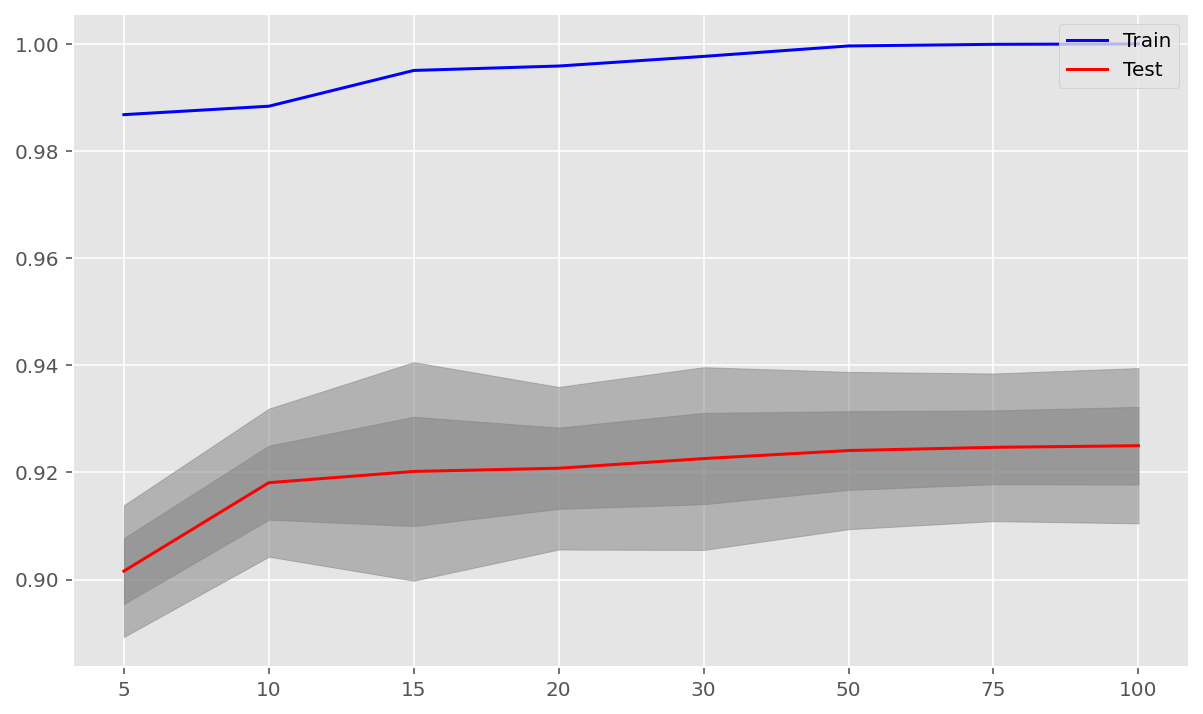

In [255]:
X_numeric, y = df.select_dtypes(include=['float64', 'int64', 'float32', 'int32']).values, np.asarray(df["Churn"], dtype='int')

trees_grid = [5, 10, 15, 20, 30, 50, 75, 100]
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
gridsearch = GridSearchCV(estimator=rfc, param_grid={"n_estimators": trees_grid}, cv=skfold, return_train_score=True, n_jobs=-1)
gridsearch.fit(X_numeric, y)

train_score, test_score, strd_train_score, std_test_score = [np.asarray(pd.DataFrame(gridsearch.cv_results_)[metric].tolist())
                           for metric in ["mean_train_score", "mean_test_score", "std_train_score", "std_test_score"]]

print("Best score:%.2f%%" %(gridsearch.best_score_ * 100))
plt.plot(train_score, 'b', test_score, 'red')
plt.xticks(range(0, 8), list(map(lambda x: str(x), trees_grid)))
plt.fill_between(range(0, 8), test_score-std_test_score, test_score+std_test_score, color='gray', alpha=0.5)
plt.fill_between(range(0, 8), test_score-2 * std_test_score, test_score+2 * std_test_score, color='gray', alpha=0.5)
plt.legend(['Train', 'Test'], loc='upper right')


Best score:92.44%


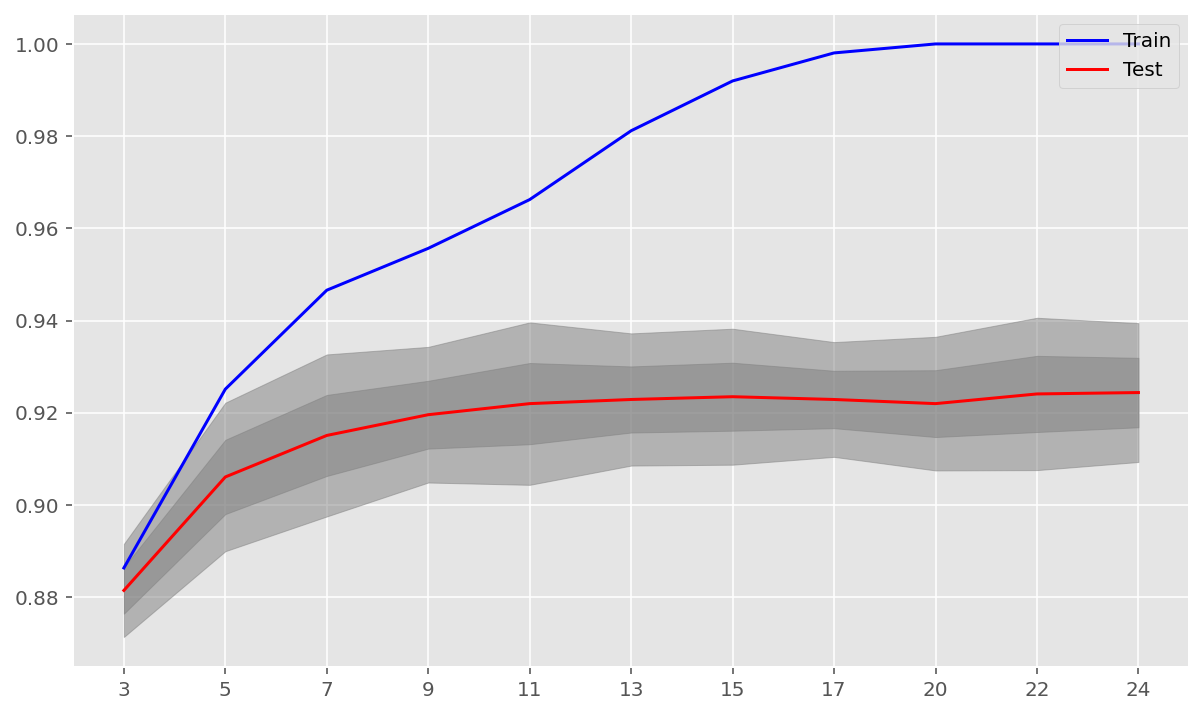

In [256]:
max_depth_grid = [3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
gridsearch = GridSearchCV(estimator=rfc, param_grid={"max_depth": max_depth_grid}, cv=skfold, return_train_score=True, n_jobs=-1)
gridsearch.fit(X_numeric, y)
train_score, test_score, strd_train_score, std_test_score = [np.asarray(pd.DataFrame(gridsearch.cv_results_)[metric].tolist())
                           for metric in ["mean_train_score", "mean_test_score", "std_train_score", "std_test_score"]]

print("Best score:%.2f%%" %(gridsearch.best_score_ * 100))
plt.plot(train_score, 'b', test_score, 'red')
plt.xticks(range(0, len(max_depth_grid)), list(map(lambda x: str(x), max_depth_grid)))
plt.fill_between(range(0, len(max_depth_grid)), test_score-std_test_score, test_score+std_test_score, color='gray', alpha=0.5)
plt.fill_between(range(0, len(max_depth_grid)), test_score-2 * std_test_score, test_score+2 * std_test_score, color='gray', alpha=0.5)
plt.legend(['Train', 'Test'], loc='upper right')

Best score:92.50%


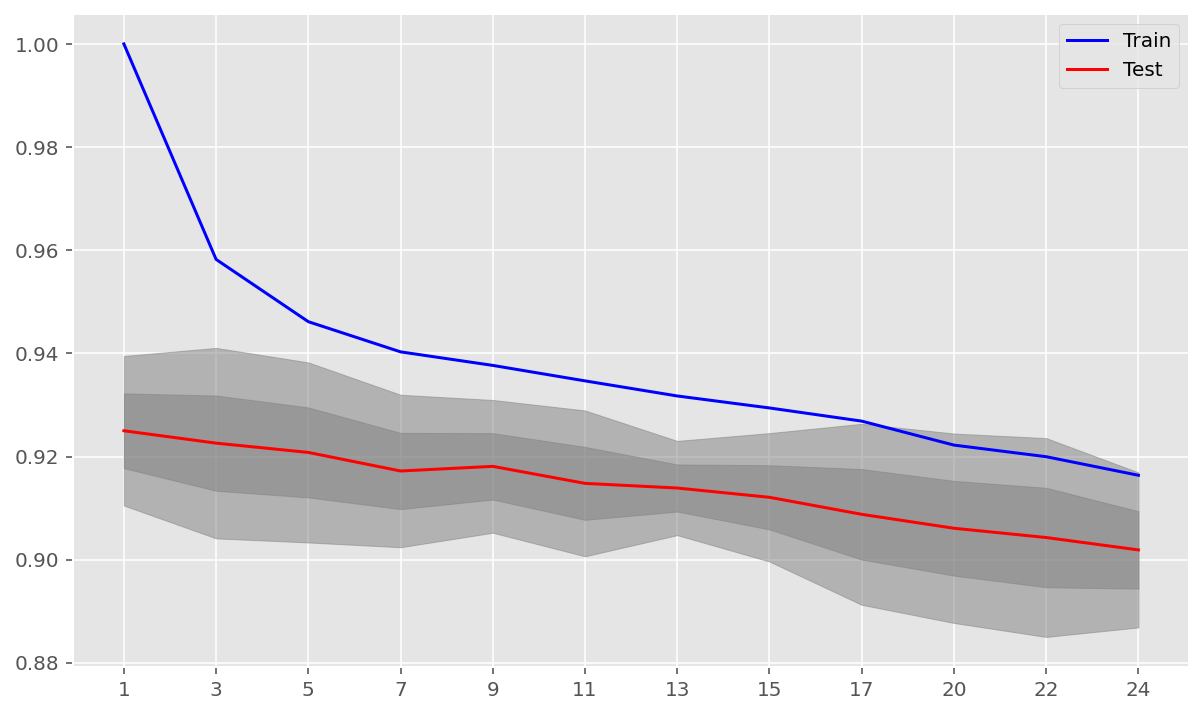

In [257]:
min_samples_leaf_grid = [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
gridsearch = GridSearchCV(
    estimator=rfc,
    param_grid={"min_samples_leaf": min_samples_leaf_grid},
    cv=skfold,
    return_train_score=True,
    n_jobs=-1)
gridsearch.fit(X_numeric, y)
train_score, test_score, strd_train_score, std_test_score = [
    np.asarray(pd.DataFrame(gridsearch.cv_results_)[metric].tolist())
    for metric in [
        "mean_train_score", "mean_test_score", "std_train_score",
        "std_test_score"
    ]
]
print("Best score:%.2f%%" %(gridsearch.best_score_ * 100))

plt.plot(train_score, 'b', test_score, 'red')
plt.xticks(range(0, len(min_samples_leaf_grid)),
           list(map(lambda x: str(x), min_samples_leaf_grid)))
plt.fill_between(range(0, len(min_samples_leaf_grid)),
                 test_score - std_test_score,
                 test_score + std_test_score,
                 color='gray',
                 alpha=0.5)
plt.fill_between(range(0, len(min_samples_leaf_grid)),
                 test_score - 2 * std_test_score,
                 test_score + 2 * std_test_score,
                 color='gray',
                 alpha=0.5)
plt.legend(['Train', 'Test'], loc='upper right')

Best score:92.50%


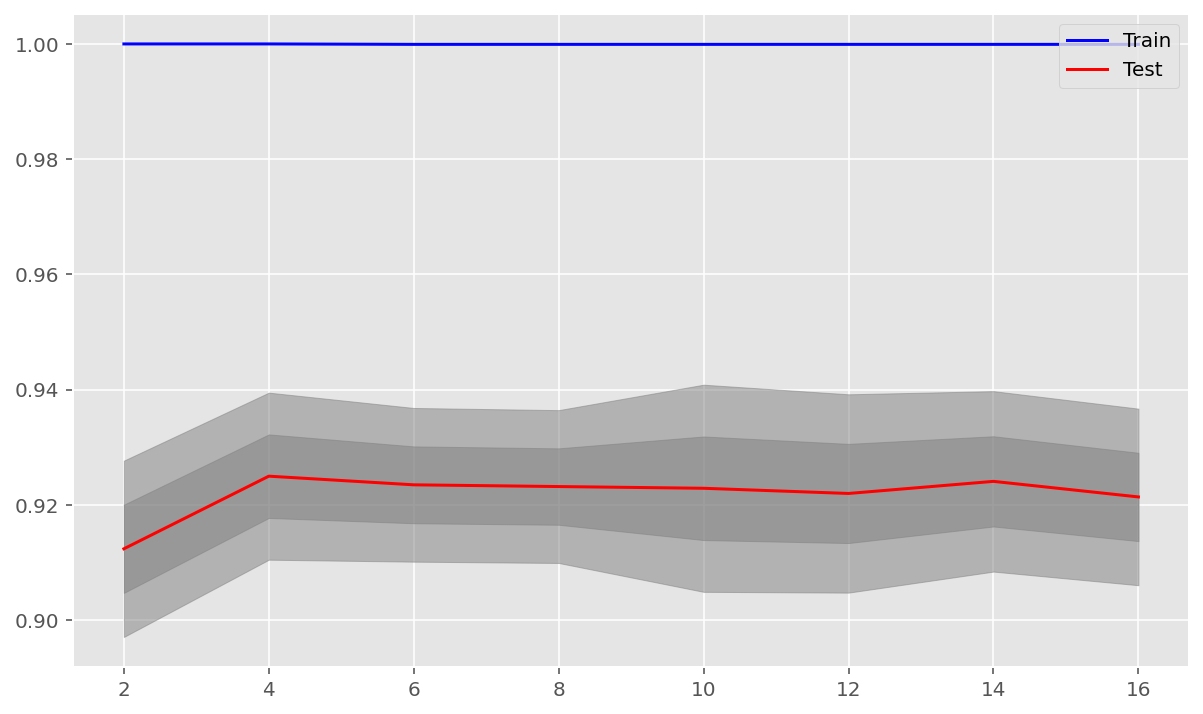

In [259]:
max_features_grid = [2, 4, 6, 8, 10, 12, 14, 16]
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
gridsearch = GridSearchCV(
    estimator=rfc,
    param_grid={"max_features": max_features_grid},
    cv=skfold,
    return_train_score=True,
    n_jobs=-1)
gridsearch.fit(X_numeric, y)
train_score, test_score, strd_train_score, std_test_score = [
    np.asarray(pd.DataFrame(gridsearch.cv_results_)[metric].tolist())
    for metric in [
        "mean_train_score", "mean_test_score", "std_train_score",
        "std_test_score"
    ]
]
print("Best score:%.2f%%" %(gridsearch.best_score_ * 100))

plt.plot(train_score, 'b', test_score, 'red')
plt.xticks(range(0, len(max_features_grid)),
           list(map(lambda x: str(x), max_features_grid)))
plt.fill_between(range(0, len(max_features_grid)),
                 test_score - std_test_score,
                 test_score + std_test_score,
                 color='gray',
                 alpha=0.5)
plt.fill_between(range(0, len(max_features_grid)),
                 test_score - 2 * std_test_score,
                 test_score + 2 * std_test_score,
                 color='gray',
                 alpha=0.5)
plt.legend(['Train', 'Test'], loc='upper right')

In [265]:
paramters = {'max_features': [4, 7, 10, 13],
            'min_samples_leaf': [1, 3, 5, 7],
            'max_depth': [5, 10, 15, 20]}
skfold = StratifiedKFold(n_splits=42, random_state=42, shuffle=True)
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)
gridsearch = GridSearchCV(estimator=rfc, param_grid=paramters, cv=skfold, n_jobs=-1, scoring='accuracy')
gridsearch.fit(X_numeric, y)
print(gridsearch.best_params_)
print(gridsearch.best_score_)

{'max_depth': 15, 'max_features': 7, 'min_samples_leaf': 1}
0.9273809523809524
